<a href="https://colab.research.google.com/github/muhammedafsalpm/ICT-Academy-of-Kerala/blob/main/Muh_Afsal_Assignment_Unsupervised.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Case study on unsupervised learning

Try out different clustering models in the given dataset. Find the optimum
number of clusters in each model and create the model with optimum number of
clusters. Also learn about dB scan clustering and implement it


1. Importing Necessary Libraries

In [177]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage

2. Loading and Preprocessing the Dataset

In [178]:
# Load the dataset
df = pd.read_csv('/content/Wine_clust  (1).csv')
df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [179]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


In [180]:
df.columns

Index(['Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium',
       'Total_Phenols', 'Flavanoids', 'Nonflavanoid_Phenols',
       'Proanthocyanins', 'Color_Intensity', 'Hue', 'OD280', 'Proline'],
      dtype='object')

In [181]:
df.isna().sum() # Here no missing values

,0
Alcohol,0
Malic_Acid,0
Ash,0
Ash_Alcanity,0
Magnesium,0
Total_Phenols,0
Flavanoids,0
Nonflavanoid_Phenols,0
Proanthocyanins,0
Color_Intensity,0


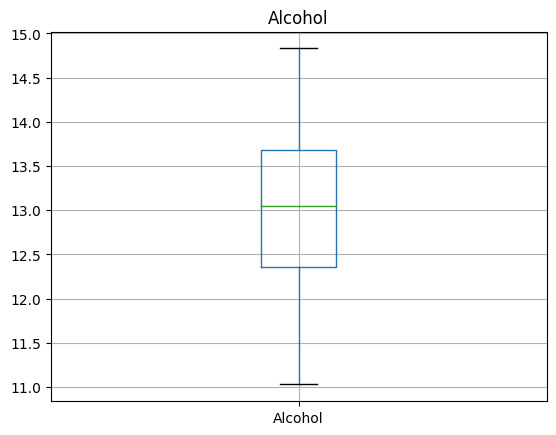

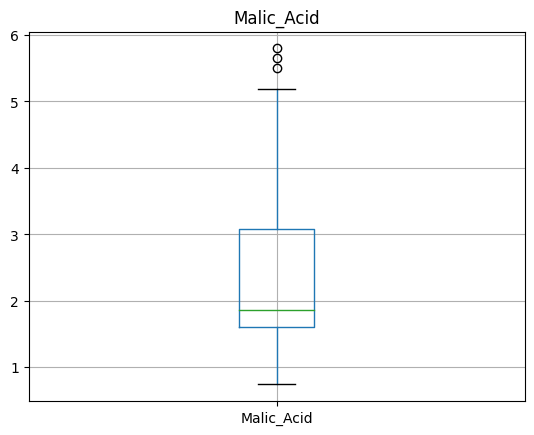

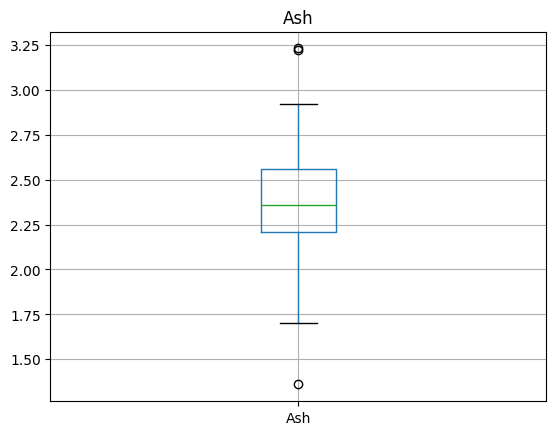

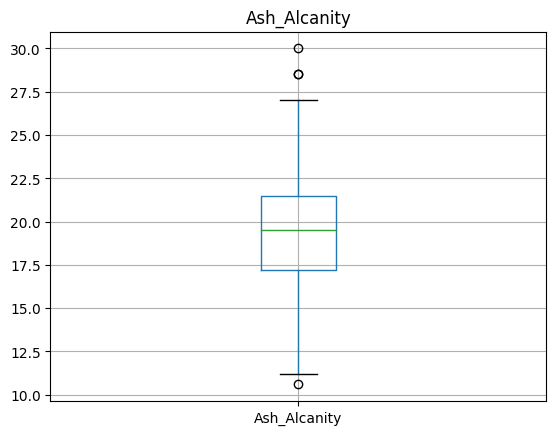

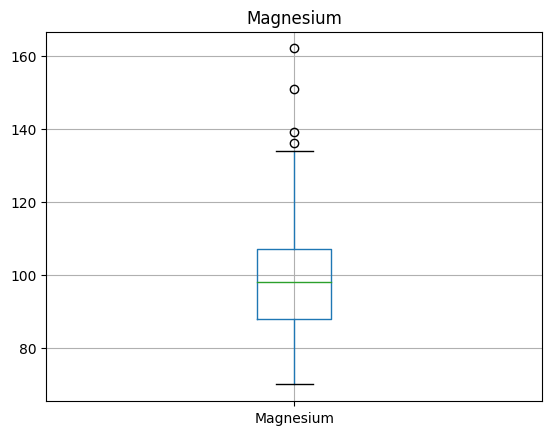

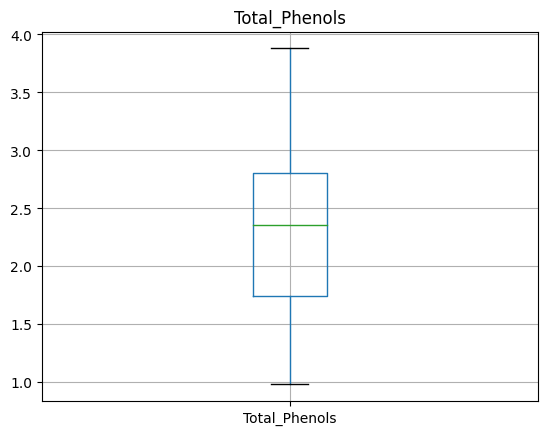

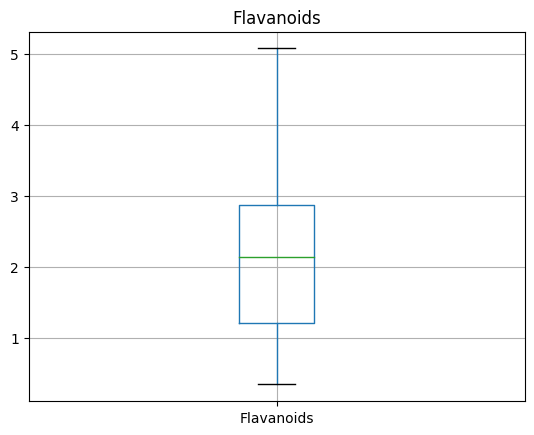

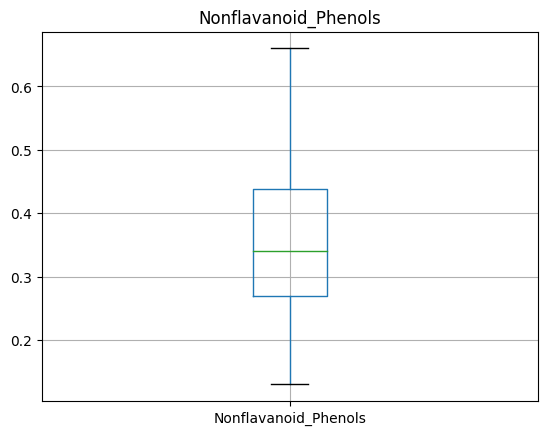

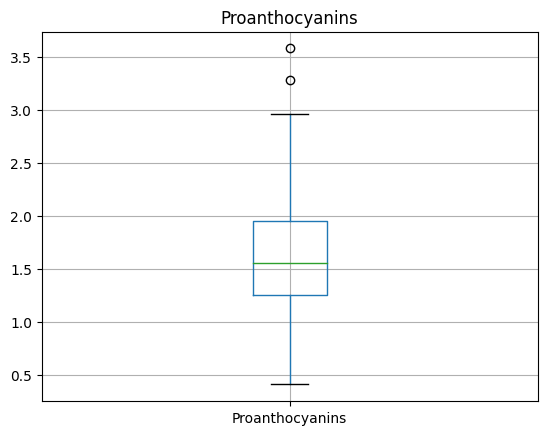

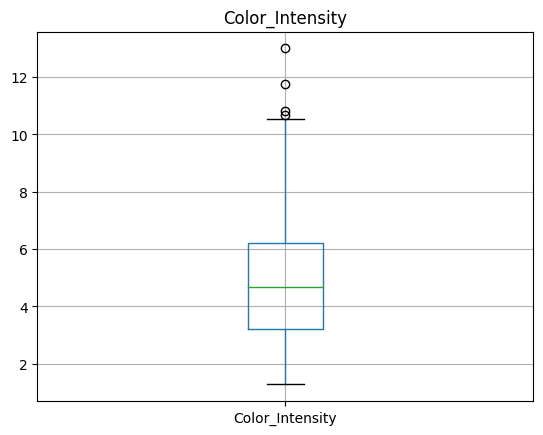

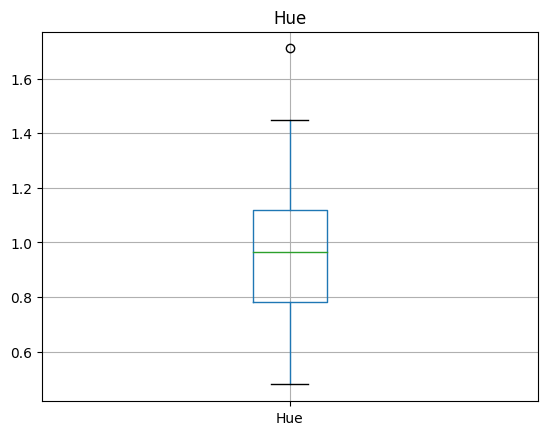

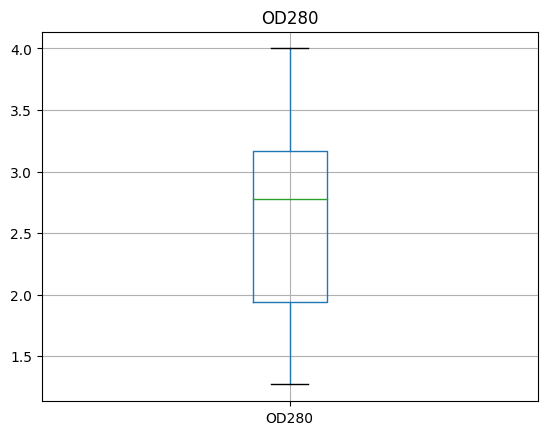

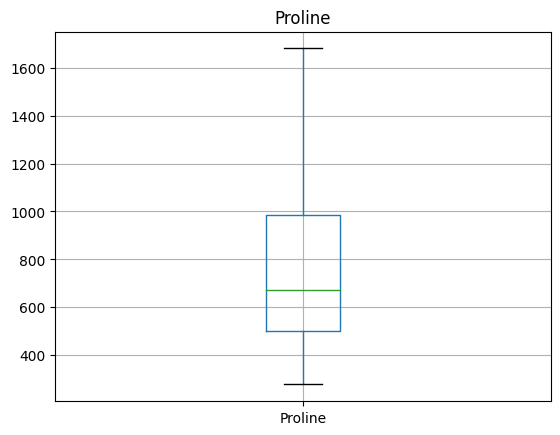

In [182]:
for col in df.columns:
    if df[col].dtype != 'object':  # Check if the column is not of object type (i.e., numeric)
        plt.figure()
        df.boxplot([col])
        plt.title(col)
        plt.show()  # This line will display each plot


In [183]:
for col in df.columns:
    if df[col].dtype != 'object':  # Check if the column is numeric
        Q1 = df[col].quantile(0.25)  # First quartile (25th percentile)
        Q3 = df[col].quantile(0.75)  # Third quartile (75th percentile)

        # To find IQR
        iqr = Q3 - Q1

        # To find lower bound and upper bound
        lower_bound = Q1 - 1.5 * iqr
        upper_bound = Q3 + 1.5 * iqr

        # Capping the outliers
        df[col] = np.where(df[col] > upper_bound, upper_bound,
                           np.where(df[col] < lower_bound, lower_bound, df[col]))



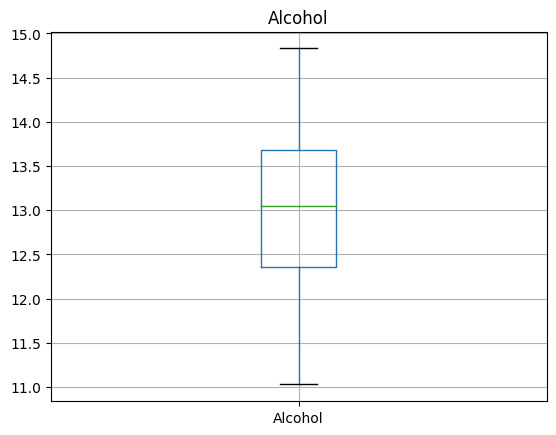

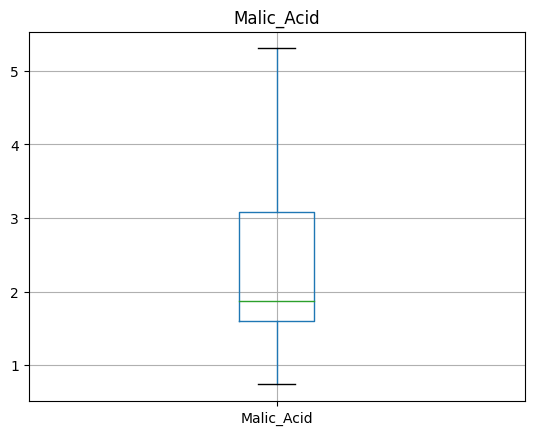

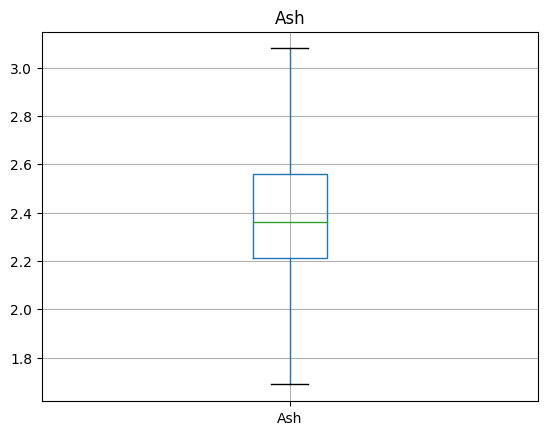

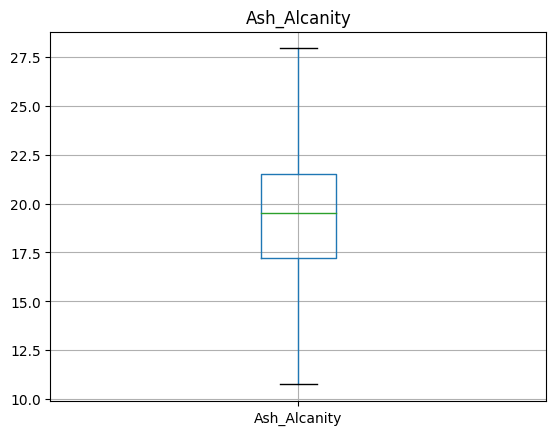

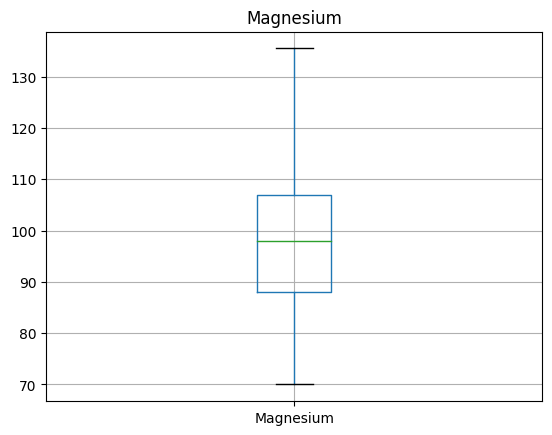

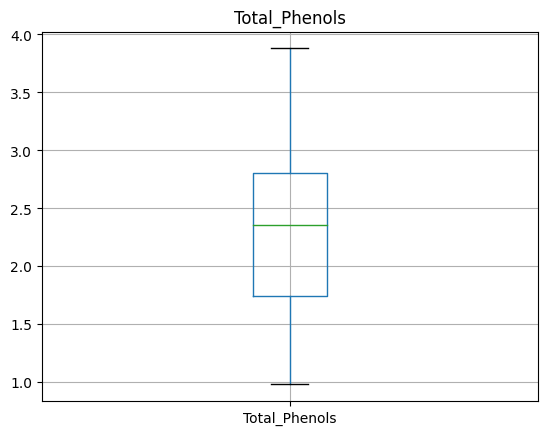

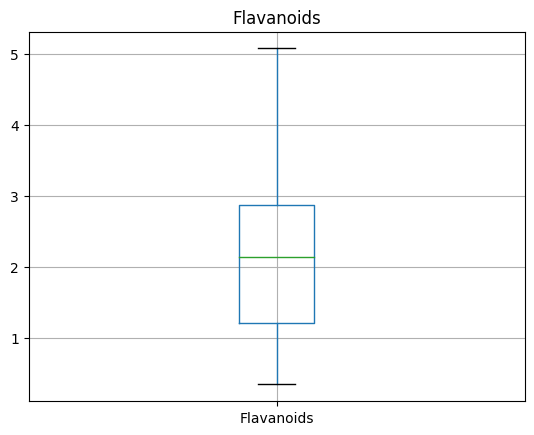

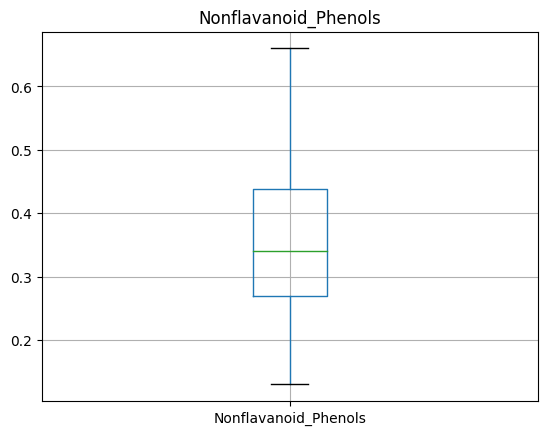

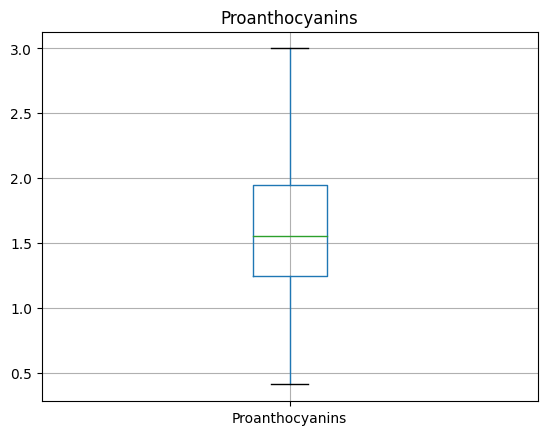

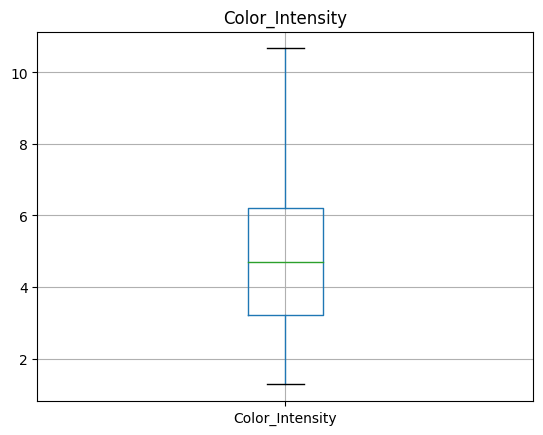

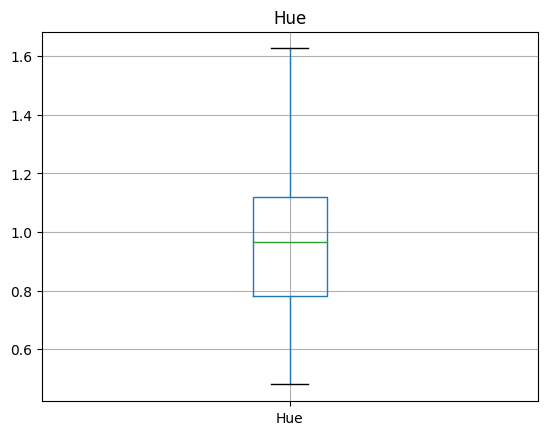

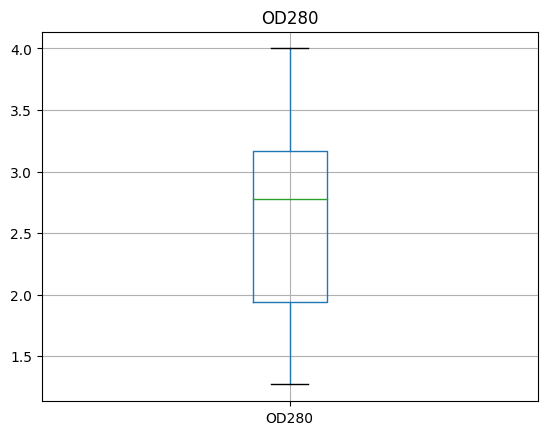

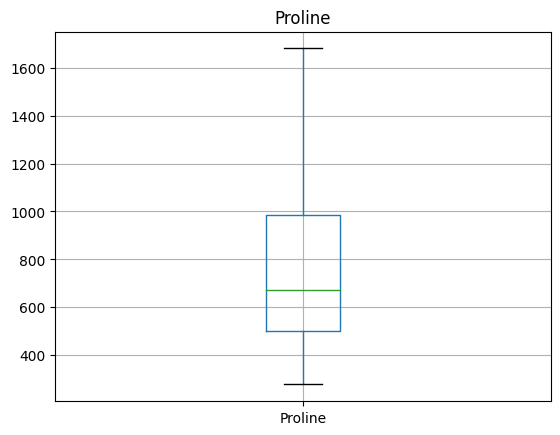

In [184]:
for col in df.columns:
    if df[col].dtype != 'object':  # Check if the column is not of object type (i.e., numeric)
        plt.figure()
        df.boxplot([col])
        plt.title(col)
        plt.show()  # This line will display each plot

Scaling

In [185]:
from sklearn.preprocessing import StandardScaler

# Assuming df is your original DataFrame with numeric columns
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

# Convert the scaled data back into a DataFrame (optional)
df_scaled = pd.DataFrame(df_scaled, columns=df.columns)

df_scaled.head()  # Display the first few rows of the scaled DataFrame

# Here Encoding is not needed because here does not have object type

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,1.518613,-0.565534,0.240640,-1.182882,2.057111,0.808997,1.034819,-0.659563,1.264740,0.266954,0.366610,1.847920,1.013009
1,0.246290,-0.501728,-0.862176,-2.524956,0.038639,0.568648,0.733629,-0.820719,-0.549904,-0.291923,0.410768,1.113449,0.965242
2,0.196879,0.026948,1.153315,-0.267832,0.113397,0.808997,1.215533,-0.498407,2.199012,0.284696,0.322451,0.788587,1.395148
3,1.691550,-0.346771,0.506837,-0.816862,1.010496,2.491446,1.466525,-0.981875,1.067105,1.225029,-0.428246,1.184071,2.334574
4,0.295700,0.236596,1.913878,0.464208,1.384287,0.808997,0.663351,0.226796,0.420301,-0.318536,0.366610,0.449601,-0.037874


**3. K-Means Clustering**

a. Finding the Optimum Number of Clusters Using the Elbow Method

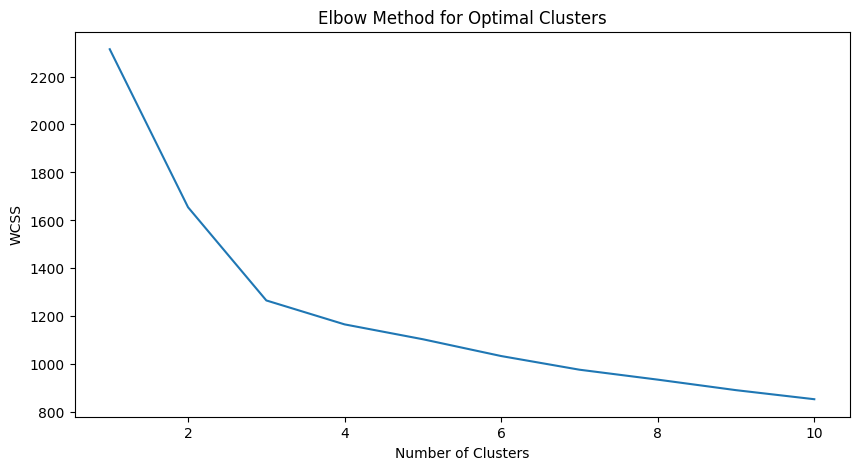

In [186]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 5))
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method for Optimal Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()


In [187]:
x = scaler.fit_transform(df)

In [188]:
# From Graph, it's clear that k has 3 is better valure

kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=42)
y_pred = kmeans.fit_predict(x)
y_pred

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int32)

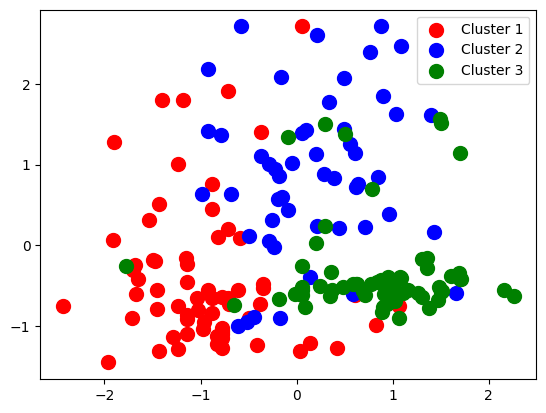

In [189]:
plt.scatter(x[y_pred==0,0],x[y_pred==0,1],s=100,c='red',label='Cluster 1')
plt.scatter(x[y_pred==1,0],x[y_pred==1,1],s=100,c='blue',label='Cluster 2')
plt.scatter(x[y_pred==2,0],x[y_pred==2,1],s=100,c='green',label='Cluster 3')

plt.legend()
plt.show()


b. Silhouette Score to Validate the Optimum Number of Clusters

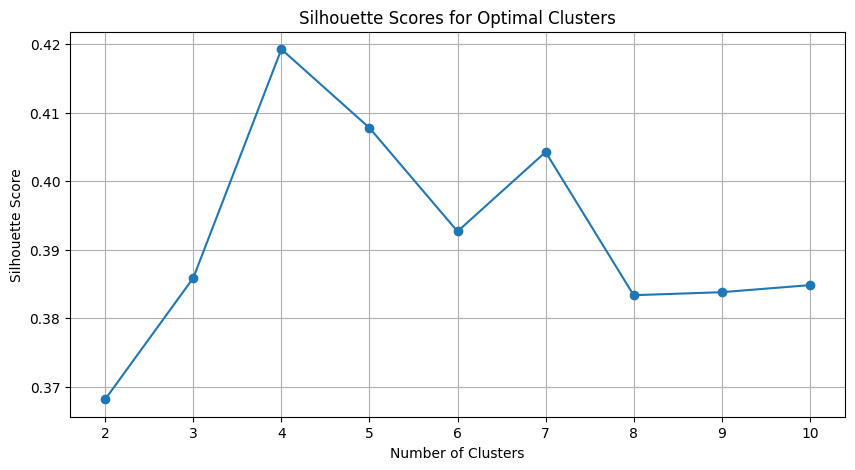

The highest silhouette score is 0.4193 for 4 clusters.


In [190]:
# Example synthetic data (replace with your actual data)
np.random.seed(0)
df_scaled = np.random.rand(200, 2)  # Replace with your actual scaled feature data

# List to hold silhouette scores
silhouette_scores = []
num_clusters_range = range(2, 11)  # Range of cluster numbers to try

for i in num_clusters_range:
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    labels = kmeans.fit_predict(df_scaled)
    score = silhouette_score(df_scaled, labels)
    silhouette_scores.append(score)

# Plotting the silhouette scores
plt.figure(figsize=(10, 5))
plt.plot(num_clusters_range, silhouette_scores, marker='o')
plt.title('Silhouette Scores for Optimal Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.xticks(num_clusters_range)
plt.grid(True)
plt.show()

# Finding and printing the highest silhouette score
max_score = max(silhouette_scores)
best_num_clusters = num_clusters_range[silhouette_scores.index(max_score)]

print(f"The highest silhouette score is {max_score:.4f} for {best_num_clusters} clusters.")

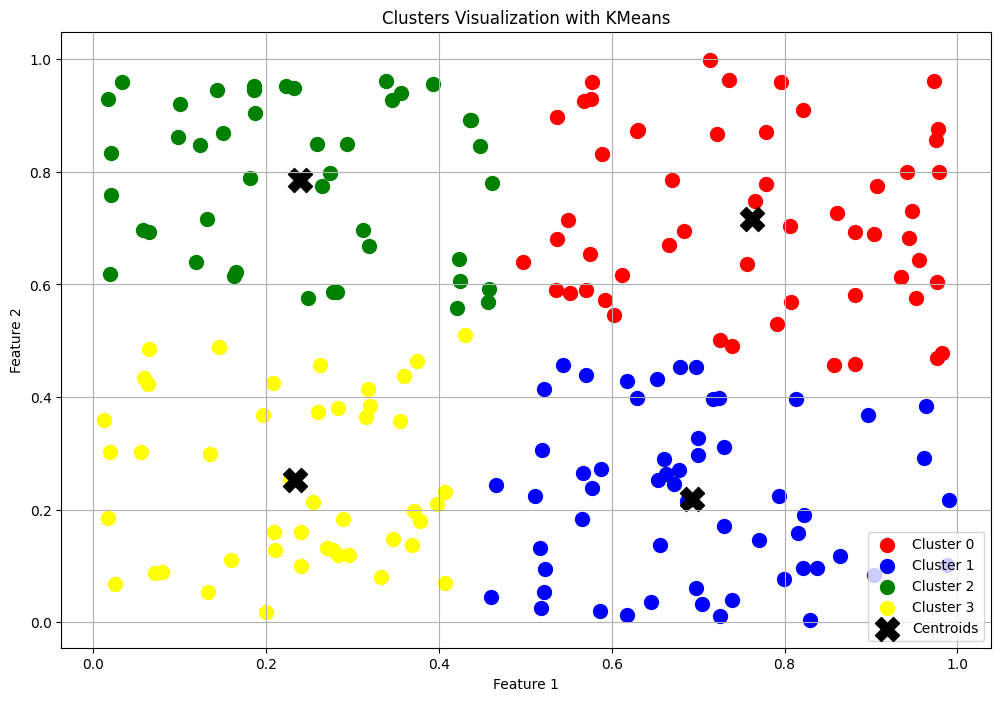

In [191]:

# Fit the KMeans model with the optimal number of clusters
optimal_clusters = 4
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', max_iter=300, n_init=10, random_state=42)
labels = kmeans.fit_predict(df_scaled)

# Plotting the clusters
plt.figure(figsize=(12, 8))

# Define colors for each cluster
colors = ['red', 'blue', 'green', 'yellow']  # Define colors for 4 clusters

# Plot each cluster with a different color
for i in range(optimal_clusters):
    plt.scatter(df_scaled[labels == i, 0], df_scaled[labels == i, 1],
                s=100, c=colors[i], label=f'Cluster {i}')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            s=300, c='black', label='Centroids', marker='X')

plt.title('Clusters Visualization with KMeans')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
plt.show()


In [192]:
optimal_clusters = 4  # Choose based on elbow or silhouette
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', max_iter=300, n_init=10, random_state=42)
kmeans_labels = kmeans.fit_predict(df_scaled)

kmeans_labels

array([0, 0, 2, 2, 1, 0, 0, 3, 2, 0, 0, 2, 2, 2, 1, 2, 2, 2, 0, 0, 3, 1,
       0, 3, 3, 1, 1, 3, 1, 1, 3, 1, 3, 1, 1, 0, 0, 1, 3, 3, 3, 2, 1, 1,
       0, 2, 2, 3, 1, 1, 1, 0, 2, 0, 2, 2, 1, 1, 0, 0, 0, 0, 2, 3, 1, 1,
       3, 0, 0, 1, 1, 2, 0, 2, 0, 2, 2, 2, 0, 3, 1, 0, 0, 3, 1, 1, 3, 1,
       2, 1, 2, 1, 0, 0, 1, 3, 2, 0, 3, 3, 2, 3, 3, 1, 0, 1, 1, 2, 3, 0,
       0, 2, 2, 1, 0, 3, 1, 3, 3, 2, 1, 1, 1, 1, 3, 2, 0, 1, 0, 1, 3, 2,
       0, 2, 3, 0, 2, 2, 0, 0, 2, 1, 3, 0, 0, 3, 1, 1, 2, 0, 0, 3, 3, 3,
       1, 1, 3, 1, 2, 0, 3, 3, 3, 0, 3, 2, 2, 0, 3, 1, 3, 1, 1, 1, 0, 1,
       3, 0, 3, 2, 2, 1, 0, 1, 0, 1, 0, 3, 0, 2, 0, 0, 0, 1, 1, 3, 2, 2,
       3, 3], dtype=int32)

**4. Agglomerative Clustering**


a. Finding the Optimum Number of Clusters Using Dendrogram

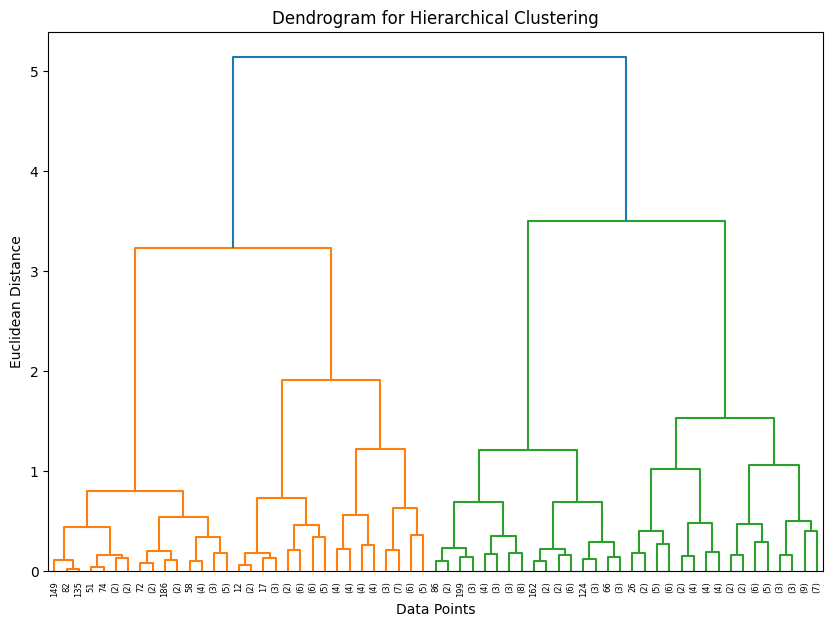

In [193]:
# Perform hierarchical clustering
linked = linkage(df_scaled, method='ward')

# Plot the dendrogram
plt.figure(figsize=(10, 7))
dendrogram(linked, truncate_mode='level', p=5)

plt.title('Dendrogram for Hierarchical Clustering')
plt.xlabel('Data Points')
plt.ylabel('Euclidean Distance')
plt.show()

In [194]:
from sklearn.cluster import AgglomerativeClustering

hc = AgglomerativeClustering(n_clusters=2,affinity='euclidean',linkage='ward')
y_pred = hc.fit_predict(x)
y_pred

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

In [195]:
optimal_clusters = 2  # Choose based on dendrogram
agg_cluster = AgglomerativeClustering(n_clusters=optimal_clusters, affinity='euclidean', linkage='ward')
agg_labels = agg_cluster.fit_predict(df_scaled)
agg_labels


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


array([1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0])

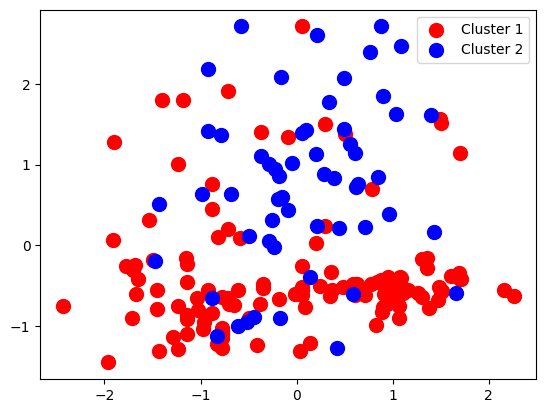

In [196]:
plt.scatter(x[y_pred==0,0],x[y_pred==0,1],s=100,c='red',label='Cluster 1')
plt.scatter(x[y_pred==1,0],x[y_pred==1,1],s=100,c='blue',label='Cluster 2')


plt.legend()
plt.show()

**5. DBSCAN Clustering**


a. Understanding DBSCAN

DBSCAN (Density-Based Spatial Clustering of Applications with Noise) is a clustering algorithm that groups together points that are closely packed together, marking outliers as noise.

In [197]:
dbscan = DBSCAN(eps=0.5, min_samples=5)  # Adjust eps and min_samples as needed
dbscan_labels = dbscan.fit_predict(df_scaled)
dbscan_labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

In [198]:
# Since DBSCAN may classify some points as noise (-1), we'll filter those out for silhouette score calculation
if len(set(dbscan_labels)) > 1:
    dbscan_silhouette = silhouette_score(df_scaled, dbscan_labels)
    print(f'Silhouette Score for DBSCAN: {dbscan_silhouette}')
else:
    print('DBSCAN resulted in a single cluster or no valid clusters.')


DBSCAN resulted in a single cluster or no valid clusters.
